#**Corner Detection and Feature Matching**

# Introduction

In this homework, you will practise corner detection and feature matching with opencv. In this link, [feature matching](https://drive.google.com/drive/folders/1WYP68d5pKTTZdXxa1mZZuPcY22iaILz2?usp=sharing) , there are 11 pictures I took around campus, one target image, 10 references. Your task is as follows:
1. Find out keypoints in each image using Harris Corner Detection or Shi-Tomasi Detection
2. Build descriptors using SIFT or ORB
3. Match keypoints in two images using Euclidean distance or other metrics
4. Find out the reference image that matches the target best (also based on distance or other metrics)

Hints:

Because the images are high resolution images, corner detection could possibly output tons of points. You need to specify a certain number of corner points you need, for the best performance of your feature matching algorithm. Or you can take your own pictures, one target, and at least 10 references.

Rubric:

Find correct key points with corner detection algo: 40pts

Build descriptors for the key points from corner detection algo: 40 pts

Perform feature matching: 20 pts


In [2]:
# from google.colab.patches import cv2_imshow
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

images location:
[feature matching](https://drive.google.com/drive/folders/1WYP68d5pKTTZdXxa1mZZuPcY22iaILz2?usp=sharing)

To make this easier, I added two commands below to download the zip file and unzip the images right in the /content folder

In [7]:
!gdown 1LoHRj44aOawe5zRnE13HQ7bt2lQXpDHv
!unzip data.zip

# Corner Detection

Harris Corner Dection document: https://docs.opencv.org/3.4/dc/d0d/tutorial_py_features_harris.html


In [61]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

class FeatureExtractor:
    def __init__(self, image_path):
        self.image_path = image_path
        self.corners = []
        self.detect_corners()

    def detect_corners(self, block_size=7, ksize=5, k=0.06, threshold=0.01):
        self.block_size = block_size
        self.ksize = ksize
        self.k = k
        self.threshold = threshold
        # Load the image
        self.image = cv2.imread(self.image_path)

        # Convert the image to grayscale
        gray = cv2.cvtColor(self.image, cv2.COLOR_BGR2GRAY)

        # Perform Harris corner detection
        corner_response = cv2.cornerHarris(gray, blockSize=self.block_size, ksize=self.ksize, k=self.k)

        # Threshold the corner response to identify strong corners
        corners = np.where(corner_response > self.threshold * corner_response.max())

        # Store the corners for this image
        self.corners = [corners]

        return self.image

    def display_image_with_corners(self):
        # Draw circles at the corner locations
        corners = self.corners[-1]
        radius = int(self.image.shape[1] / 1000)
        for pt in zip(*corners[::-1]):
            cv2.circle(self.image, pt, radius=radius, color=(0, 255, 0), thickness=2)

        # Display the image with detected corners using matplotlib
        plt.imshow(cv2.cvtColor(self.image, cv2.COLOR_BGR2RGB))
        plt.title('Corners')
        plt.axis('off')
        plt.show()

In [28]:
import os
HOME = os.getcwd()
print(HOME)

c:\Users\Ryan Barry\OneDrive - rit.edu\Laptop Backup\Desktop\RIT\Robot Perception\Homework\HW7


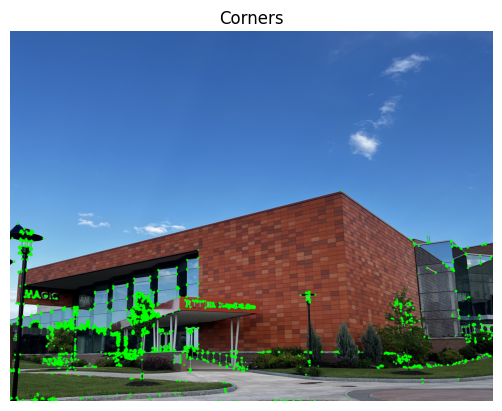

In [62]:
FM = f'{HOME}/feature_matching'
REF_DIR = f'{FM}/references/'
image_path = f'{FM}/target.jpg'
feat = FeatureExtractor(image_path)
feat.display_image_with_corners()

In [63]:
features = []
for filename in os.listdir(REF_DIR):
    image_path = os.path.join(REF_DIR, filename)
    features.append(FeatureExtractor(image_path))

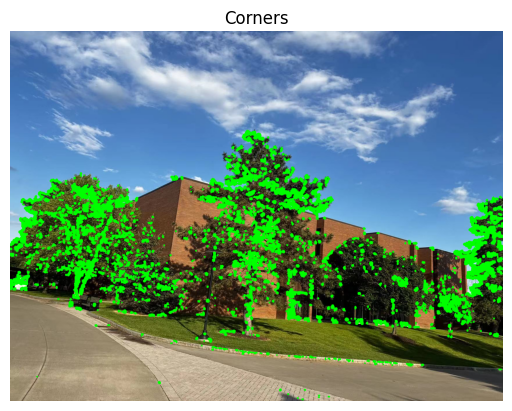

In [66]:
features[10].display_image_with_corners()

# Feature Matching

ORB/SIFT/FLANN feature matching document: https://docs.opencv.org/4.x/dc/dc3/tutorial_py_matcher.html

# Output Example

You can try different corner detection and feature matching algorithms. Here's a simple example of Harris Corner Detection and Flann matching output:

Corner Detection:

<img src="https://drive.google.com/uc?export=view&id=1_lxN5962rkummApSF3GyPnEyXZKmc-jA" width=600>


Feature Matching:

<img src="https://drive.google.com/uc?export=view&id=1FoqX3JlU9B7xup19S_-w554bb_MsE28t" width=600>

<img src="https://drive.google.com/uc?export=view&id=1q3cYnMHQFxnVbzxpRMSEy43A7pG69qYm" width=600>
